In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [2]:
cols = ['Info','Appearance','Ratings','Reviews','Dis_Price','Og_Price','Dis_Perc']

In [3]:
df= pd.read_csv(r"C:\Users\krtej\OneDrive\Desktop\SCIT study material\Assignments\Flipkart Scraper.csv", names = cols)
df

,Info,Appearance,Ratings,Reviews,Dis_Price,Og_Price,Dis_Perc
0,MSI Katana GF66 Core i7 11th Gen - (16 GB/1 TB...,"15.6 inches, Black, 2.25 kg",4.4,(317),"₹75,990","₹1,17,990",35% off
1,Lenovo IdeaPad Gaming Core i5 11th Gen - (8 GB...,"15.6 Inch, Shadow Black, 2.25 kg",4.3,(142),"₹49,990","₹76,890",34% off
2,HP Pavilion Ryzen 5 Hexa Core 5600H - (8 GB/51...,"15.6 inch, Shadow Black, 1.98 kg",4.5,"(7,007)","₹56,990","₹74,841",23% off
3,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,"17.3 Inch, Graphite Black, 2.60 Kg",4.7,(18),"₹55,990","₹71,990",22% off
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,"15.6 inch, Black Plastic, 2.30 kg kg",4.5,(177),"₹52,990","₹70,990",25% off
...,...,...,...,...,...,...,...
308,HP Pavilion Gaming Ryzen 7 Octa Core 4800H - (...,"15.6 inch, Shadow Black, 2.19 kg, With MS Office",4.5,"(1,330)","₹74,990","₹93,565",19% off
309,MSI Pulse GL66 Core i7 11th Gen - (16 GB/1 TB ...,"15.6 inches, Grey, 2.25 kg",4.6,(112),"₹99,990","₹1,39,990",28% off
310,DELL Core i5 11th Gen - (16 GB/512 GB SSD/Wind...,"15.6 inch, Dark Shadow Grey, 2.65 kg, With MS ...",3.8,(16),"₹73,490","₹96,000",23% off
311,acer Predator Helios 300 Octa Core i7 10th Gen...,"15.6 inch, Black, 2.3 kg",4.5,"(1,431)","₹99,990","₹1,49,999",33% off


In [4]:
for i in range(313):
    y = df.iloc[i,0].split()
    df.loc[i,'Company'] = y[0]
df.head()

,Info,Appearance,Ratings,Reviews,Dis_Price,Og_Price,Dis_Perc,Company
0,MSI Katana GF66 Core i7 11th Gen - (16 GB/1 TB...,"15.6 inches, Black, 2.25 kg",4.4,(317),"₹75,990","₹1,17,990",35% off,MSI
1,Lenovo IdeaPad Gaming Core i5 11th Gen - (8 GB...,"15.6 Inch, Shadow Black, 2.25 kg",4.3,(142),"₹49,990","₹76,890",34% off,Lenovo
2,HP Pavilion Ryzen 5 Hexa Core 5600H - (8 GB/51...,"15.6 inch, Shadow Black, 1.98 kg",4.5,"(7,007)","₹56,990","₹74,841",23% off,HP
3,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,"17.3 Inch, Graphite Black, 2.60 Kg",4.7,(18),"₹55,990","₹71,990",22% off,ASUS
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,"15.6 inch, Black Plastic, 2.30 kg kg",4.5,(177),"₹52,990","₹70,990",25% off,ASUS


In [5]:
size=[]
color=[]
weight= []
new= []
for i in range(313):
    y = df.loc[i,'Appearance'].split(',')
    y=y[:3]
    if len(y)<3:
        y.append('0')
    
    size.append(y[0])
    color.append(y[1])
    weight.append(y[2])
print(size) 
print(color)
print(weight)

['15.6 inches', '15.6 Inch', '15.6 inch', '17.3 Inch', '15.6 inch', '15.6 inch', '16.1 inch', '15.6 inch', '15.6 Inch', '15.6 inch', '15.6 inch', '15.6 inches', '15.6 inch', '15.6 Inch', '15.6 inch', '15.6 inch', '15.6 inch', '15.6 inch', '15.6 inch', '15.6 inch', '15.6 inch', '15.6 inch', '15.6 inch', '15.6 inch', '15.6 inch', '15.6 inch', '15.6 Inch', '15.6 Inch', '15.6 inch', '15.6 inch', '15.6 inch', '15.6 inch', '15.6 inch', '15.6 inches', '15.6 inch', '15.6 inch', '15.6 inch', '15.6 inch', '15.6 inch', '15.6 inch', '15.6 inch', '15.6 inch', '15.6 Inch', '15.6 Inch', '15.6 Inch', '15.6 inch', '15.6 Inch', '15.6 inches', '17.3 inch', '15.6 Inch', '17.3 inch', '15.6 inch', '15.6 inch', '15.6 inch', '15.6 inch', '15.6 inch', '15.6 inch', '15.6 Inch', '15.6 Inch', '15.6 inch', '14 inch', '15.6 inch', '15.6 Inch', '15.6 Inch', '15.6 inch', '15.6 Inch', '15.6 Inch', '15.6 inch', '17.3 Inch', '16.1 inch', '15.6 inch', '15.6 Inch', '15.6 inch', '17.3 Inch', '15.6 inch', '15.6 inch', '14 I

In [6]:
weight_filtered = []
x=int()
for i in weight:
    x = re.findall(r'\d[.|]\d{0,2}', i)
    weight_filtered.append(x)
print(weight_filtered)

[['2.25'], ['2.25'], ['1.98'], ['2.60'], ['2.30'], ['2.25'], ['2.48'], ['2.15'], ['1.86'], ['2.1'], ['2.2'], ['1.90'], ['2.30'], ['2.30'], ['2.25'], ['2.25'], [], ['2.25'], ['2.57'], ['2.15'], ['2.10'], ['2.57'], ['2.25'], ['2.25'], ['2.3'], ['2.30'], ['2.10'], ['1.98'], ['1.86'], ['1.86'], ['2.38'], ['2.25'], ['2.14'], ['2.25'], ['2.19'], ['2.65'], ['2.3'], ['2.30'], ['2.35'], ['2.2'], ['2.4'], ['2.50'], ['2.3'], ['1.86'], ['2.10'], ['2.3'], ['2.25'], ['2.28'], ['2.60'], ['1.86'], ['2.60'], ['2.23'], ['1.98'], ['1.86'], ['1.9'], [], ['2.30'], ['2.3'], ['2.3'], ['2.30'], ['1.45'], ['2.20'], ['1.86'], ['2.57'], ['1.98'], ['2.57'], ['2.25'], [], ['2.60'], ['2.32'], ['2.10'], ['2.3'], ['2.30'], ['2.60'], ['1.98'], ['2.14'], ['1.60'], ['2.2'], ['2.60'], ['2.10'], ['2.30'], ['2.20'], ['2.37'], ['1.60'], ['2.32'], ['2.3'], ['1.86'], ['1.90'], ['2.10'], ['2.10'], ['2.1'], [], ['2.60'], [], ['1.90'], ['2.57'], ['1.8'], ['2.65'], ['2.5'], ['2.00'], ['2.14'], ['2.30'], ['1.90'], ['2.15'], ['1.6'

In [7]:
for i in weight[239:242]:
    print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>


In [8]:
imputed_weight= []
for i in weight_filtered:
    if i==[]:
        i=['0']
        imputed_weight.append(i)
    else:
        imputed_weight.append(i)
        
imputed_weight

[['2.25'],
 ['2.25'],
 ['1.98'],
 ['2.60'],
 ['2.30'],
 ['2.25'],
 ['2.48'],
 ['2.15'],
 ['1.86'],
 ['2.1'],
 ['2.2'],
 ['1.90'],
 ['2.30'],
 ['2.30'],
 ['2.25'],
 ['2.25'],
 ['0'],
 ['2.25'],
 ['2.57'],
 ['2.15'],
 ['2.10'],
 ['2.57'],
 ['2.25'],
 ['2.25'],
 ['2.3'],
 ['2.30'],
 ['2.10'],
 ['1.98'],
 ['1.86'],
 ['1.86'],
 ['2.38'],
 ['2.25'],
 ['2.14'],
 ['2.25'],
 ['2.19'],
 ['2.65'],
 ['2.3'],
 ['2.30'],
 ['2.35'],
 ['2.2'],
 ['2.4'],
 ['2.50'],
 ['2.3'],
 ['1.86'],
 ['2.10'],
 ['2.3'],
 ['2.25'],
 ['2.28'],
 ['2.60'],
 ['1.86'],
 ['2.60'],
 ['2.23'],
 ['1.98'],
 ['1.86'],
 ['1.9'],
 ['0'],
 ['2.30'],
 ['2.3'],
 ['2.3'],
 ['2.30'],
 ['1.45'],
 ['2.20'],
 ['1.86'],
 ['2.57'],
 ['1.98'],
 ['2.57'],
 ['2.25'],
 ['0'],
 ['2.60'],
 ['2.32'],
 ['2.10'],
 ['2.3'],
 ['2.30'],
 ['2.60'],
 ['1.98'],
 ['2.14'],
 ['1.60'],
 ['2.2'],
 ['2.60'],
 ['2.10'],
 ['2.30'],
 ['2.20'],
 ['2.37'],
 ['1.60'],
 ['2.32'],
 ['2.3'],
 ['1.86'],
 ['1.90'],
 ['2.10'],
 ['2.10'],
 ['2.1'],
 ['0'],
 ['2.60'],
 ['0

In [9]:
cleaned_weight = []
for sublist in imputed_weight:
    for item in sublist:
        cleaned_weight.append(float(item))

print(cleaned_weight)

[2.25, 2.25, 1.98, 2.6, 2.3, 2.25, 2.48, 2.15, 1.86, 2.1, 2.2, 1.9, 2.3, 2.3, 2.25, 2.25, 0.0, 2.25, 2.57, 2.15, 2.1, 2.57, 2.25, 2.25, 2.3, 2.3, 2.1, 1.98, 1.86, 1.86, 2.38, 2.25, 2.14, 2.25, 2.19, 2.65, 2.3, 2.3, 2.35, 2.2, 2.4, 2.5, 2.3, 1.86, 2.1, 2.3, 2.25, 2.28, 2.6, 1.86, 2.6, 2.23, 1.98, 1.86, 1.9, 0.0, 2.3, 2.3, 2.3, 2.3, 1.45, 2.2, 1.86, 2.57, 1.98, 2.57, 2.25, 0.0, 2.6, 2.32, 2.1, 2.3, 2.3, 2.6, 1.98, 2.14, 1.6, 2.2, 2.6, 2.1, 2.3, 2.2, 2.37, 1.6, 2.32, 2.3, 1.86, 1.9, 2.1, 2.1, 2.1, 0.0, 2.6, 0.0, 1.9, 2.57, 1.8, 2.65, 2.5, 2.0, 2.14, 2.3, 1.9, 2.15, 1.6, 2.6, 2.4, 2.5, 2.9, 2.25, 2.51, 2.5, 2.1, 2.6, 2.3, 2.4, 2.6, 2.33, 1.18, 1.95, 2.56, 2.3, 2.6, 2.15, 2.5, 2.25, 2.23, 2.1, 1.98, 1.72, 2.6, 2.3, 1.3, 0.0, 2.4, 2.5, 1.9, 2.3, 0.0, 2.6, 2.25, 2.19, 0.0, 0.0, 2.4, 1.98, 2.25, 2.4, 2.2, 2.4, 2.2, 2.6, 2.4, 2.4, 2.5, 1.18, 2.5, 2.65, 2.25, 2.3, 2.3, 1.3, 2.5, 2.5, 2.2, 2.2, 2.1, 2.3, 2.51, 2.3, 2.4, 2.5, 2.6, 1.18, 2.47, 2.4, 2.1, 2.5, 2.57, 0.0, 2.14, 2.25, 2.0, 2.62, 2.1, 1

In [10]:
count = 0
for i in cleaned_weight:
    if i == "":
        count+=1
print(count)

0


In [11]:
count = 0
for i in size:
    if i =="":
        count+=1
print(count)

0


In [12]:
count = 0
for i in color:
    if i =="":
        count+=1
print(count)

0


In [13]:
df['Screen_Size'] = size
df['Color'] = color
df['Weight'] = cleaned_weight
df.head()

,Info,Appearance,Ratings,Reviews,Dis_Price,Og_Price,Dis_Perc,Company,Screen_Size,Color,Weight
0,MSI Katana GF66 Core i7 11th Gen - (16 GB/1 TB...,"15.6 inches, Black, 2.25 kg",4.4,(317),"₹75,990","₹1,17,990",35% off,MSI,15.6 inches,Black,2.25
1,Lenovo IdeaPad Gaming Core i5 11th Gen - (8 GB...,"15.6 Inch, Shadow Black, 2.25 kg",4.3,(142),"₹49,990","₹76,890",34% off,Lenovo,15.6 Inch,Shadow Black,2.25
2,HP Pavilion Ryzen 5 Hexa Core 5600H - (8 GB/51...,"15.6 inch, Shadow Black, 1.98 kg",4.5,"(7,007)","₹56,990","₹74,841",23% off,HP,15.6 inch,Shadow Black,1.98
3,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,"17.3 Inch, Graphite Black, 2.60 Kg",4.7,(18),"₹55,990","₹71,990",22% off,ASUS,17.3 Inch,Graphite Black,2.60
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,"15.6 inch, Black Plastic, 2.30 kg kg",4.5,(177),"₹52,990","₹70,990",25% off,ASUS,15.6 inch,Black Plastic,2.30


In [14]:
df.shape

(313, 11)

In [15]:
df['Dis_Perc'].isna().sum()

20

In [16]:
df['Dis_Perc'].fillna('0 %off',inplace= True)

In [17]:
for i in range(313):
    d = re.findall(r'[0-9]+',df.loc[i,'Dis_Perc'])
    df.loc[i,'Dis_Perc'] = int(d[0])
df.head()

,Info,Appearance,Ratings,Reviews,Dis_Price,Og_Price,Dis_Perc,Company,Screen_Size,Color,Weight
0,MSI Katana GF66 Core i7 11th Gen - (16 GB/1 TB...,"15.6 inches, Black, 2.25 kg",4.4,(317),"₹75,990","₹1,17,990",35,MSI,15.6 inches,Black,2.25
1,Lenovo IdeaPad Gaming Core i5 11th Gen - (8 GB...,"15.6 Inch, Shadow Black, 2.25 kg",4.3,(142),"₹49,990","₹76,890",34,Lenovo,15.6 Inch,Shadow Black,2.25
2,HP Pavilion Ryzen 5 Hexa Core 5600H - (8 GB/51...,"15.6 inch, Shadow Black, 1.98 kg",4.5,"(7,007)","₹56,990","₹74,841",23,HP,15.6 inch,Shadow Black,1.98
3,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,"17.3 Inch, Graphite Black, 2.60 Kg",4.7,(18),"₹55,990","₹71,990",22,ASUS,17.3 Inch,Graphite Black,2.60
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,"15.6 inch, Black Plastic, 2.30 kg kg",4.5,(177),"₹52,990","₹70,990",25,ASUS,15.6 inch,Black Plastic,2.30


In [18]:
for i in range(313):
    cost = re.findall(r'[0-9]+,[0-9]+\,?[0-9]*',df.loc[i,'Dis_Price'])
    n_cost = cost[0].replace(',','')
    df.loc[i,'Dis_Price'] = int(n_cost)
df.head()

,Info,Appearance,Ratings,Reviews,Dis_Price,Og_Price,Dis_Perc,Company,Screen_Size,Color,Weight
0,MSI Katana GF66 Core i7 11th Gen - (16 GB/1 TB...,"15.6 inches, Black, 2.25 kg",4.4,(317),75990,"₹1,17,990",35,MSI,15.6 inches,Black,2.25
1,Lenovo IdeaPad Gaming Core i5 11th Gen - (8 GB...,"15.6 Inch, Shadow Black, 2.25 kg",4.3,(142),49990,"₹76,890",34,Lenovo,15.6 Inch,Shadow Black,2.25
2,HP Pavilion Ryzen 5 Hexa Core 5600H - (8 GB/51...,"15.6 inch, Shadow Black, 1.98 kg",4.5,"(7,007)",56990,"₹74,841",23,HP,15.6 inch,Shadow Black,1.98
3,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,"17.3 Inch, Graphite Black, 2.60 Kg",4.7,(18),55990,"₹71,990",22,ASUS,17.3 Inch,Graphite Black,2.60
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,"15.6 inch, Black Plastic, 2.30 kg kg",4.5,(177),52990,"₹70,990",25,ASUS,15.6 inch,Black Plastic,2.30


In [19]:
for i in range(313):
    dprice = df.loc[i,'Dis_Price']
    dperc = df.loc[i,'Dis_Perc']
    df.loc[i,'Og_Price'] = int((dprice * 100)/ (100 - dperc))
df.head()

,Info,Appearance,Ratings,Reviews,Dis_Price,Og_Price,Dis_Perc,Company,Screen_Size,Color,Weight
0,MSI Katana GF66 Core i7 11th Gen - (16 GB/1 TB...,"15.6 inches, Black, 2.25 kg",4.4,(317),75990,116907,35,MSI,15.6 inches,Black,2.25
1,Lenovo IdeaPad Gaming Core i5 11th Gen - (8 GB...,"15.6 Inch, Shadow Black, 2.25 kg",4.3,(142),49990,75742,34,Lenovo,15.6 Inch,Shadow Black,2.25
2,HP Pavilion Ryzen 5 Hexa Core 5600H - (8 GB/51...,"15.6 inch, Shadow Black, 1.98 kg",4.5,"(7,007)",56990,74012,23,HP,15.6 inch,Shadow Black,1.98
3,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,"17.3 Inch, Graphite Black, 2.60 Kg",4.7,(18),55990,71782,22,ASUS,17.3 Inch,Graphite Black,2.60
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,"15.6 inch, Black Plastic, 2.30 kg kg",4.5,(177),52990,70653,25,ASUS,15.6 inch,Black Plastic,2.30


In [20]:
for i in range(313):
    sc_size = re.findall(r'[0-9][0-9].[0-9]*',df.loc[i,'Screen_Size'])
    df.loc[i,'Screen_Size'] = float(sc_size[0])
df.head()

,Info,Appearance,Ratings,Reviews,Dis_Price,Og_Price,Dis_Perc,Company,Screen_Size,Color,Weight
0,MSI Katana GF66 Core i7 11th Gen - (16 GB/1 TB...,"15.6 inches, Black, 2.25 kg",4.4,(317),75990,116907,35,MSI,15.6,Black,2.25
1,Lenovo IdeaPad Gaming Core i5 11th Gen - (8 GB...,"15.6 Inch, Shadow Black, 2.25 kg",4.3,(142),49990,75742,34,Lenovo,15.6,Shadow Black,2.25
2,HP Pavilion Ryzen 5 Hexa Core 5600H - (8 GB/51...,"15.6 inch, Shadow Black, 1.98 kg",4.5,"(7,007)",56990,74012,23,HP,15.6,Shadow Black,1.98
3,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,"17.3 Inch, Graphite Black, 2.60 Kg",4.7,(18),55990,71782,22,ASUS,17.3,Graphite Black,2.60
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,"15.6 inch, Black Plastic, 2.30 kg kg",4.5,(177),52990,70653,25,ASUS,15.6,Black Plastic,2.30


In [21]:
df['Ratings'].isna().sum()

123

In [22]:
df['Ratings'].fillna(0,inplace = True)

In [23]:
df['Reviews'].isna().sum()

123

In [24]:
df['Reviews'].fillna('0',inplace = True)

In [25]:
for i in range(313):
    rv = re.findall(r'-?[0-9]*\,?[0-9]+\,?[0-9]*',df.loc[i,'Reviews'])
    n_rv = rv[0].replace(',','')
    df.loc[i,'Reviews'] = abs(int(n_rv))
df.head()

,Info,Appearance,Ratings,Reviews,Dis_Price,Og_Price,Dis_Perc,Company,Screen_Size,Color,Weight
0,MSI Katana GF66 Core i7 11th Gen - (16 GB/1 TB...,"15.6 inches, Black, 2.25 kg",4.4,317,75990,116907,35,MSI,15.6,Black,2.25
1,Lenovo IdeaPad Gaming Core i5 11th Gen - (8 GB...,"15.6 Inch, Shadow Black, 2.25 kg",4.3,142,49990,75742,34,Lenovo,15.6,Shadow Black,2.25
2,HP Pavilion Ryzen 5 Hexa Core 5600H - (8 GB/51...,"15.6 inch, Shadow Black, 1.98 kg",4.5,7007,56990,74012,23,HP,15.6,Shadow Black,1.98
3,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,"17.3 Inch, Graphite Black, 2.60 Kg",4.7,18,55990,71782,22,ASUS,17.3,Graphite Black,2.60
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,"15.6 inch, Black Plastic, 2.30 kg kg",4.5,177,52990,70653,25,ASUS,15.6,Black Plastic,2.30


In [26]:
df.drop('Appearance',axis = 1,inplace = True)

In [27]:
df.head()

,Info,Ratings,Reviews,Dis_Price,Og_Price,Dis_Perc,Company,Screen_Size,Color,Weight
0,MSI Katana GF66 Core i7 11th Gen - (16 GB/1 TB...,4.4,317,75990,116907,35,MSI,15.6,Black,2.25
1,Lenovo IdeaPad Gaming Core i5 11th Gen - (8 GB...,4.3,142,49990,75742,34,Lenovo,15.6,Shadow Black,2.25
2,HP Pavilion Ryzen 5 Hexa Core 5600H - (8 GB/51...,4.5,7007,56990,74012,23,HP,15.6,Shadow Black,1.98
3,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,4.7,18,55990,71782,22,ASUS,17.3,Graphite Black,2.60
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.5,177,52990,70653,25,ASUS,15.6,Black Plastic,2.30


In [28]:
w_mean= df.groupby('Company').agg({'Weight':'mean'})
w_mean

,Weight
Company,
ALIENWARE,2.500000
ASUS,1.759262
DELL,2.400250
HP,2.007941
Lenovo,1.890909
MSI,2.093529
acer,2.257143


In [29]:
df[df.loc[:,'Weight'] == 0].head()

,Info,Ratings,Reviews,Dis_Price,Og_Price,Dis_Perc,Company,Screen_Size,Color,Weight
16,Lenovo Legion 5 Ryzen 7 Octa Core 5800H - (16 ...,4.8,4,119990,181803,34,Lenovo,15.6,Phantom Blue,0.0
55,ASUS Ryzen 5 Dual Core 5th Gen - (8 GB/512 GB ...,0.0,0,55990,76698,27,ASUS,15.6,Black,0.0
67,ASUS Core i5 11th Gen - (8 GB/1 TB SSD/Windows...,0.0,0,76990,97455,21,ASUS,15.6,Graphite Black,0.0
91,Lenovo Legion 5 Core i7 11th Gen - (16 GB/512 ...,4.2,33,99990,151500,34,Lenovo,15.6,Phantom Blue,0.0
93,Lenovo Legion 5 Pro Core i7 11th Gen - (16 GB/...,4.6,10,144990,223061,35,Lenovo,16.0,Stingray,0.0


In [30]:
c_index = w_mean.index

In [31]:
for i in c_index:
    df.loc[(df.loc[:,'Weight'] == 0) & (df.loc[:,'Company'] == i),'Weight'] = w_mean.loc[i,'Weight']

In [32]:
df.dtypes

Info            object
Ratings        float64
Reviews         object
Dis_Price       object
Og_Price        object
Dis_Perc        object
Company         object
Screen_Size     object
Color           object
Weight         float64
dtype: object

In [33]:
df.Company.unique()

array(['MSI', 'Lenovo', 'HP', 'ASUS', 'acer', 'DELL', 'ALIENWARE'],
      dtype=object)

In [34]:
for i in df.loc[:,'Screen_Size']:
    df["Screen_Size"].replace(i, float(i), inplace=True)
df.head()

,Info,Ratings,Reviews,Dis_Price,Og_Price,Dis_Perc,Company,Screen_Size,Color,Weight
0,MSI Katana GF66 Core i7 11th Gen - (16 GB/1 TB...,4.4,317,75990,116907,35,MSI,15.6,Black,2.25
1,Lenovo IdeaPad Gaming Core i5 11th Gen - (8 GB...,4.3,142,49990,75742,34,Lenovo,15.6,Shadow Black,2.25
2,HP Pavilion Ryzen 5 Hexa Core 5600H - (8 GB/51...,4.5,7007,56990,74012,23,HP,15.6,Shadow Black,1.98
3,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,4.7,18,55990,71782,22,ASUS,17.3,Graphite Black,2.60
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.5,177,52990,70653,25,ASUS,15.6,Black Plastic,2.30


In [35]:
for i in df.loc[:,'Ratings']:
    df["Ratings"].replace(i, float(i), inplace=True)
df.head()

,Info,Ratings,Reviews,Dis_Price,Og_Price,Dis_Perc,Company,Screen_Size,Color,Weight
0,MSI Katana GF66 Core i7 11th Gen - (16 GB/1 TB...,4.4,317,75990,116907,35,MSI,15.6,Black,2.25
1,Lenovo IdeaPad Gaming Core i5 11th Gen - (8 GB...,4.3,142,49990,75742,34,Lenovo,15.6,Shadow Black,2.25
2,HP Pavilion Ryzen 5 Hexa Core 5600H - (8 GB/51...,4.5,7007,56990,74012,23,HP,15.6,Shadow Black,1.98
3,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,4.7,18,55990,71782,22,ASUS,17.3,Graphite Black,2.60
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.5,177,52990,70653,25,ASUS,15.6,Black Plastic,2.30


In [36]:
for i in df.loc[:,'Reviews']:
    df["Reviews"].replace(i, int(i), inplace=True)
df.head()

,Info,Ratings,Reviews,Dis_Price,Og_Price,Dis_Perc,Company,Screen_Size,Color,Weight
0,MSI Katana GF66 Core i7 11th Gen - (16 GB/1 TB...,4.4,317,75990,116907,35,MSI,15.6,Black,2.25
1,Lenovo IdeaPad Gaming Core i5 11th Gen - (8 GB...,4.3,142,49990,75742,34,Lenovo,15.6,Shadow Black,2.25
2,HP Pavilion Ryzen 5 Hexa Core 5600H - (8 GB/51...,4.5,7007,56990,74012,23,HP,15.6,Shadow Black,1.98
3,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,4.7,18,55990,71782,22,ASUS,17.3,Graphite Black,2.60
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.5,177,52990,70653,25,ASUS,15.6,Black Plastic,2.30


In [37]:
for i in df.loc[:,'Dis_Price']:
    df["Dis_Price"].replace(i, int(i), inplace=True)
df.head()

,Info,Ratings,Reviews,Dis_Price,Og_Price,Dis_Perc,Company,Screen_Size,Color,Weight
0,MSI Katana GF66 Core i7 11th Gen - (16 GB/1 TB...,4.4,317,75990,116907,35,MSI,15.6,Black,2.25
1,Lenovo IdeaPad Gaming Core i5 11th Gen - (8 GB...,4.3,142,49990,75742,34,Lenovo,15.6,Shadow Black,2.25
2,HP Pavilion Ryzen 5 Hexa Core 5600H - (8 GB/51...,4.5,7007,56990,74012,23,HP,15.6,Shadow Black,1.98
3,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,4.7,18,55990,71782,22,ASUS,17.3,Graphite Black,2.60
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.5,177,52990,70653,25,ASUS,15.6,Black Plastic,2.30


In [38]:
for i in df.loc[:,'Og_Price']:
    df["Og_Price"].replace(i, int(i), inplace=True)
df.head()

,Info,Ratings,Reviews,Dis_Price,Og_Price,Dis_Perc,Company,Screen_Size,Color,Weight
0,MSI Katana GF66 Core i7 11th Gen - (16 GB/1 TB...,4.4,317,75990,116907,35,MSI,15.6,Black,2.25
1,Lenovo IdeaPad Gaming Core i5 11th Gen - (8 GB...,4.3,142,49990,75742,34,Lenovo,15.6,Shadow Black,2.25
2,HP Pavilion Ryzen 5 Hexa Core 5600H - (8 GB/51...,4.5,7007,56990,74012,23,HP,15.6,Shadow Black,1.98
3,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,4.7,18,55990,71782,22,ASUS,17.3,Graphite Black,2.60
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.5,177,52990,70653,25,ASUS,15.6,Black Plastic,2.30


In [39]:
for i in df.loc[:,'Dis_Perc']:
    df["Dis_Perc"].replace(i, int(i), inplace=True)
df.head()

,Info,Ratings,Reviews,Dis_Price,Og_Price,Dis_Perc,Company,Screen_Size,Color,Weight
0,MSI Katana GF66 Core i7 11th Gen - (16 GB/1 TB...,4.4,317,75990,116907,35,MSI,15.6,Black,2.25
1,Lenovo IdeaPad Gaming Core i5 11th Gen - (8 GB...,4.3,142,49990,75742,34,Lenovo,15.6,Shadow Black,2.25
2,HP Pavilion Ryzen 5 Hexa Core 5600H - (8 GB/51...,4.5,7007,56990,74012,23,HP,15.6,Shadow Black,1.98
3,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,4.7,18,55990,71782,22,ASUS,17.3,Graphite Black,2.60
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.5,177,52990,70653,25,ASUS,15.6,Black Plastic,2.30


In [40]:
df.dtypes

Info            object
Ratings        float64
Reviews          int64
Dis_Price        int64
Og_Price         int64
Dis_Perc         int64
Company         object
Screen_Size    float64
Color           object
Weight         float64
dtype: object

In [41]:
df1 = df.iloc[:,[1,2,3,4,5,7,9]]
df1.head()

,Ratings,Reviews,Dis_Price,Og_Price,Dis_Perc,Screen_Size,Weight
0,4.4,317,75990,116907,35,15.6,2.25
1,4.3,142,49990,75742,34,15.6,2.25
2,4.5,7007,56990,74012,23,15.6,1.98
3,4.7,18,55990,71782,22,17.3,2.60
4,4.5,177,52990,70653,25,15.6,2.30


In [42]:
corr = df1.corr()

In [43]:
corr.style.background_gradient('coolwarm')

,Ratings,Reviews,Dis_Price,Og_Price,Dis_Perc,Screen_Size,Weight
Ratings,1.000000,0.224826,-0.320059,-0.289629,0.201067,0.095164,0.210393
Reviews,0.224826,1.000000,-0.201219,-0.187038,0.165925,0.032407,0.012033
Dis_Price,-0.320059,-0.201219,1.000000,0.957107,-0.330699,-0.108837,-0.045248
Og_Price,-0.289629,-0.187038,0.957107,1.000000,-0.077554,-0.142144,-0.095028
Dis_Perc,0.201067,0.165925,-0.330699,-0.077554,1.000000,-0.092128,-0.159564
Screen_Size,0.095164,0.032407,-0.108837,-0.142144,-0.092128,1.000000,0.683928
Weight,0.210393,0.012033,-0.045248,-0.095028,-0.159564,0.683928,1.000000


In [44]:
sns.set(style = 'whitegrid', font_scale = 1.1, rc={'axes.facecolor':'#ffffff', 'figure.facecolor':'#ffffff',
                                                                   "axes.spines.right": False, "axes.spines.top": False})

<AxesSubplot:xlabel='Company', ylabel='Og_Price'>

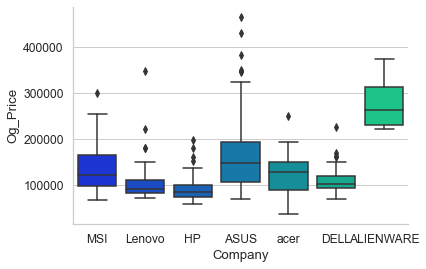

In [45]:
sns.boxplot(data = df, x = 'Company', y = 'Og_Price', palette = 'winter')

In [46]:
color = df.Color.value_counts()

In [47]:
color.head()

 Black               61
 Shadow Black        34
 Eclipse Gray        24
 Off Black           13
 Dark Shadow Grey    12
Name: Color, dtype: int64

<AxesSubplot:title={'center':'Count of Laptops based on Colour'}, ylabel='Count'>

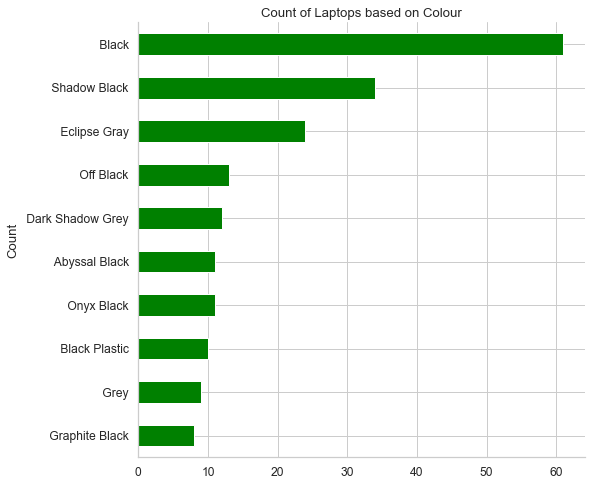

In [48]:
color[:10].sort_values().plot(kind = 'barh',figsize = (8,8), color = 'Green', xlabel = 'Count', ylabel = 'Company',
                             title = 'Count of Laptops based on Colour')

In [49]:
c_name = df['Company'].value_counts()
c_name

ASUS         122
Lenovo        44
DELL          40
acer          35
MSI           34
HP            34
ALIENWARE      4
Name: Company, dtype: int64

# Pie chart for number of laptops appeared per company

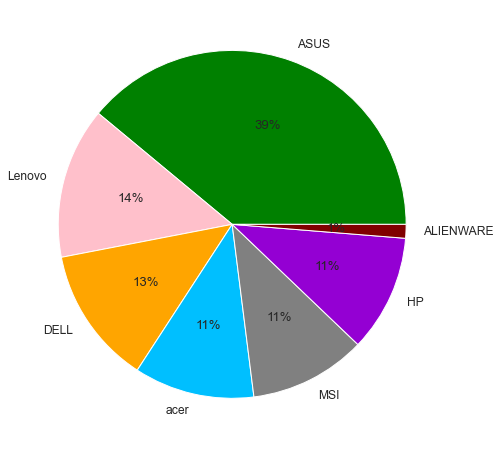

In [50]:
plt.figure(figsize = (8,8))
plt.pie(x = c_name, data = df, labels = c_name.index, autopct = '%.0f%%', colors = ['Green','pink','orange','deepskyblue','gray','darkviolet','maroon'])
plt.show()

<AxesSubplot:title={'center':'Count of laptops listed based on Company'}, xlabel='Company', ylabel='Count'>

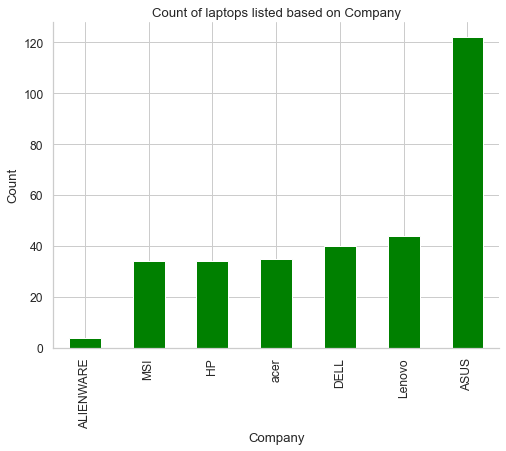

In [51]:
c_name.sort_values().plot(kind = 'bar',figsize = (8,6), color = 'Green', title = 'Count of laptops listed based on Company',
                         ylabel = 'Count', xlabel = 'Company')

In [52]:
r_count = df.groupby('Company').agg({'Reviews':'sum','Company' : 'count'})
r_count

,Reviews,Company
Company,,
ALIENWARE,40,4
ASUS,26061,122
DELL,4075,40
HP,25843,34
Lenovo,6386,44
MSI,11226,34
acer,41333,35


# Pie Chart for sum of reviews based on company

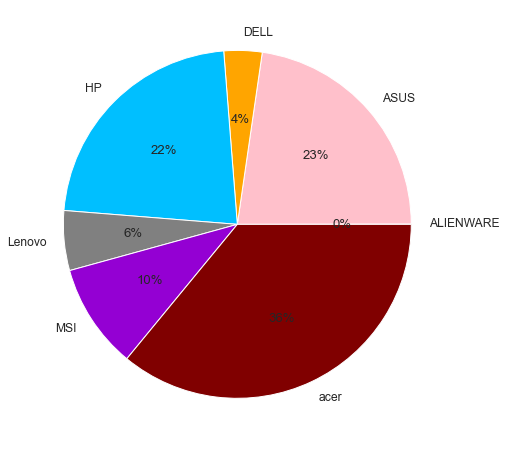

In [53]:
plt.figure(figsize = (8,8))
plt.pie(x = r_count.iloc[:,0], data = df, labels = r_count.index, autopct = '%.0f%%',colors = ['Green','pink','orange','deepskyblue','gray','darkviolet','maroon'])
plt.show()

# Bar Graph for Number of Reviews based on company

<AxesSubplot:title={'center':' Sum of Number of Reviews based on Company'}, xlabel='Company', ylabel='Reviews'>

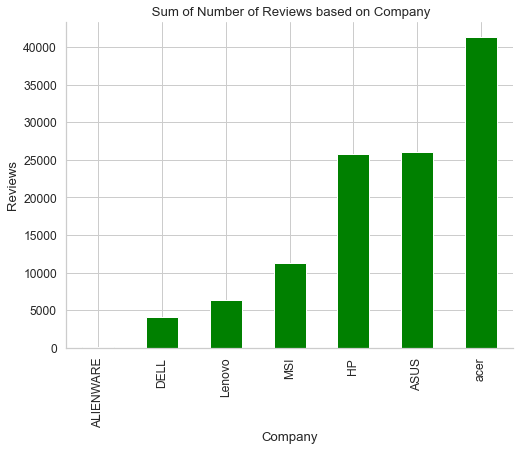

In [54]:
r_count.iloc[:,0].sort_values().plot(kind = 'bar',figsize = (8,6), color = 'Green',title = ' Sum of Number of Reviews based on Company',
                                    ylabel = 'Reviews', xlabel = 'Company')

In [55]:
r_mean = df.groupby('Company').agg({'Ratings':'mean'})
r_mean

,Ratings
Company,
ALIENWARE,4.400000
ASUS,2.084426
DELL,3.217500
HP,2.761765
Lenovo,3.136364
MSI,2.914706
acer,3.111429


<AxesSubplot:title={'center':'Average Ratings based on Company'}, xlabel='Company', ylabel='Average rating'>

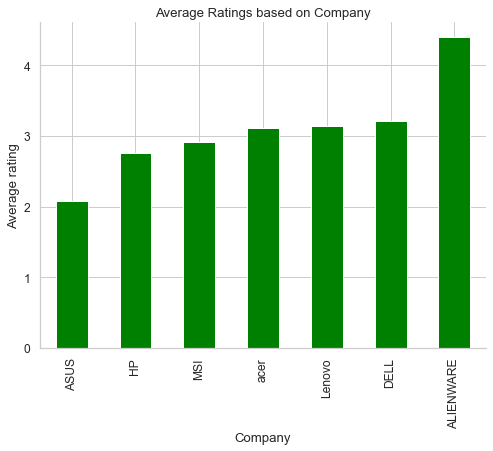

In [56]:
r_mean.iloc[:,0].sort_values().plot(kind = 'bar',figsize = (8,6), color = 'Green',title = 'Average Ratings based on Company',
                                   ylabel = 'Average rating', xlabel = 'Company')

In [57]:
df.head()

,Info,Ratings,Reviews,Dis_Price,Og_Price,Dis_Perc,Company,Screen_Size,Color,Weight
0,MSI Katana GF66 Core i7 11th Gen - (16 GB/1 TB...,4.4,317,75990,116907,35,MSI,15.6,Black,2.25
1,Lenovo IdeaPad Gaming Core i5 11th Gen - (8 GB...,4.3,142,49990,75742,34,Lenovo,15.6,Shadow Black,2.25
2,HP Pavilion Ryzen 5 Hexa Core 5600H - (8 GB/51...,4.5,7007,56990,74012,23,HP,15.6,Shadow Black,1.98
3,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,4.7,18,55990,71782,22,ASUS,17.3,Graphite Black,2.60
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.5,177,52990,70653,25,ASUS,15.6,Black Plastic,2.30


In [58]:
df['Screen_Size'].unique()

array([15.6 , 17.3 , 16.1 , 14.  , 16.  , 13.4 , 14.96, 13.3 ])

In [59]:
screen = df.groupby('Screen_Size').agg({'Screen_Size':'count'})
screen

,Screen_Size
Screen_Size,
13.30,1
13.40,13
14.00,14
14.96,1
15.60,245
16.00,14
16.10,9
17.30,16


<AxesSubplot:title={'center':'Screen Sizes Count'}, xlabel='Size', ylabel='Count'>

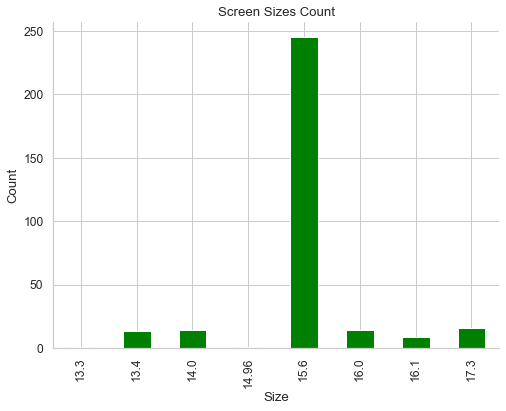

In [60]:
screen.iloc[:,0].plot(kind = 'bar',figsize = (8,6), color = 'Green',title = 'Screen Sizes Count',
                                   ylabel = 'Count', xlabel = 'Size')

<AxesSubplot:ylabel='Frequency'>

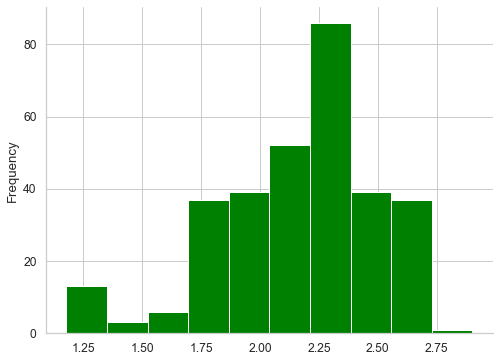

In [61]:
df['Weight'].plot(kind = 'hist', color = 'Green', figsize = (8,6))

<AxesSubplot:ylabel='Frequency'>

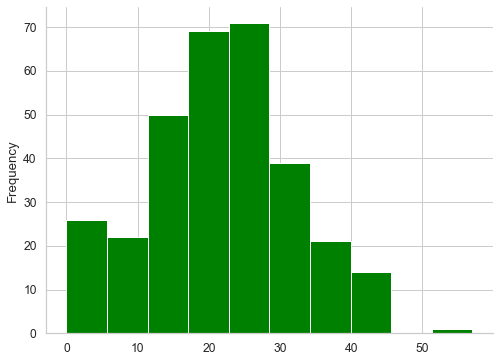

In [62]:
df['Dis_Perc'].plot(kind = 'hist', color = 'Green', figsize = (8,6))

In [63]:
avg_price = df.groupby('Company').agg({'Og_Price':'mean'})
avg_price

,Og_Price
Company,
ALIENWARE,281405.500000
ASUS,166329.811475
DELL,110777.800000
HP,95879.764706
Lenovo,108144.954545
MSI,138167.941176
acer,125329.885714


<AxesSubplot:title={'center':'Average Price based on Company'}, xlabel='Company', ylabel='Average_Price'>

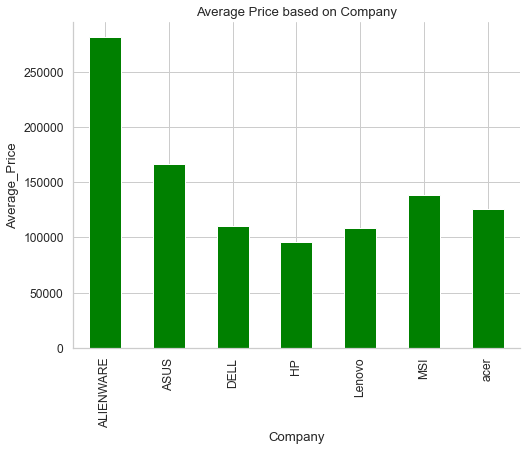

In [64]:
avg_price.iloc[:,0].plot(kind = 'bar',figsize = (8,6), color = 'Green',title = 'Average Price based on Company',
                                   ylabel = 'Average_Price', xlabel = 'Company')

In [65]:
avg_discount = df.groupby('Company').agg({'Dis_Perc':'mean'})
avg_discount

,Dis_Perc
Company,
ALIENWARE,10.250000
ASUS,22.336066
DELL,17.500000
HP,15.088235
Lenovo,27.568182
MSI,24.205882
acer,23.371429


<AxesSubplot:title={'center':'Average Discount based on Company'}, xlabel='Company', ylabel='Average Discount'>

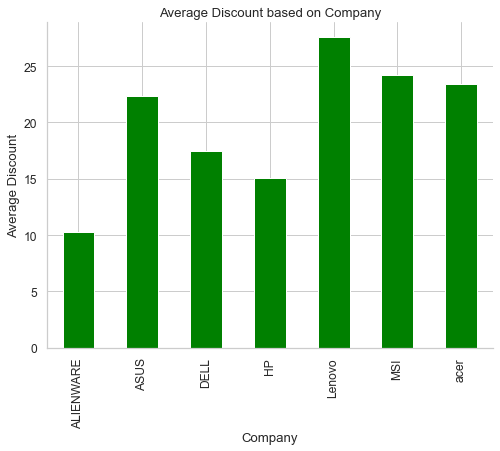

In [66]:
avg_discount.iloc[:,0].plot(kind = 'bar',figsize = (8,6), color = 'Green',title = 'Average Discount based on Company',
                                   ylabel = 'Average Discount', xlabel = 'Company')

In [67]:
corr = df.corr()
corr.style.background_gradient('coolwarm')

,Ratings,Reviews,Dis_Price,Og_Price,Dis_Perc,Screen_Size,Weight
Ratings,1.000000,0.224826,-0.320059,-0.289629,0.201067,0.095164,0.210393
Reviews,0.224826,1.000000,-0.201219,-0.187038,0.165925,0.032407,0.012033
Dis_Price,-0.320059,-0.201219,1.000000,0.957107,-0.330699,-0.108837,-0.045248
Og_Price,-0.289629,-0.187038,0.957107,1.000000,-0.077554,-0.142144,-0.095028
Dis_Perc,0.201067,0.165925,-0.330699,-0.077554,1.000000,-0.092128,-0.159564
Screen_Size,0.095164,0.032407,-0.108837,-0.142144,-0.092128,1.000000,0.683928
Weight,0.210393,0.012033,-0.045248,-0.095028,-0.159564,0.683928,1.000000
